In [1]:
import pandas as pd

df_train = pd.read_csv("train.csv", header=None, names=["label", "title", "review"])
df_test = pd.read_csv("test.csv", header=None, names=["label", "title", "review"])

In [2]:
# Separate classes
neg = df_train[df_train["label"] == 1]
pos = df_train[df_train["label"] == 2]

# Sample equally from both
neg_small = neg.sample(50000, random_state=42)
pos_small = pos.sample(50000, random_state=42)

# Combine
df_train_small = pd.concat([neg_small, pos_small])
df_train_small = df_train_small.sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
#reduce the test dataset
df_test_small = df_test.sample(10000, random_state=42).reset_index(drop=True)

In [10]:
#converst to csv
df_train_small.to_csv("train_small.csv", index=False)
df_test_small.to_csv("test_small.csv", index=False)

In [11]:
#loading the reduced dataset
df_train = pd.read_csv("train_small.csv")
df_test = pd.read_csv("test_small.csv")

In [12]:
df_train.shape,df_test.shape

((100000, 3), (10000, 3))

In [13]:
#checks
df_train_small["label"].value_counts()
df_test_small["label"].value_counts()

label
2    5028
1    4972
Name: count, dtype: int64

In [14]:
label_map = {1: "negative", 2: "positive"}

df_train["sentiment_text"] = df_train["label"].map(label_map)
df_test["sentiment_text"]  = df_test["label"].map(label_map)

df_train[["label", "sentiment_text"]].head()

,label,sentiment_text
0,2,positive
1,2,positive
2,1,negative
3,2,positive
4,2,positive


In [15]:
df_train.info()
df_train.isnull().sum()

df_train["sentiment_text"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   label           100000 non-null  int64 
 1   title           99994 non-null   object
 2   review          100000 non-null  object
 3   sentiment_text  100000 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.1+ MB


sentiment_text
positive    50000
negative    50000
Name: count, dtype: int64

count    100000.000000
mean         74.135270
std          42.386084
min           1.000000
25%          38.000000
50%          66.000000
75%         103.000000
max         216.000000
Name: review_length, dtype: float64


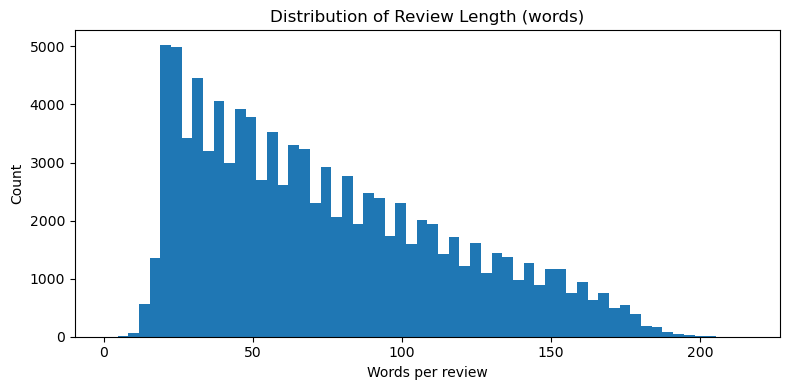

In [16]:
import matplotlib.pyplot as plt

df_train["review_length"] = df_train["review"].apply(lambda x: len(str(x).split()))

print(df_train["review_length"].describe())

plt.figure(figsize=(8,4))
plt.hist(df_train["review_length"], bins=60)
plt.title("Distribution of Review Length (words)")
plt.xlabel("Words per review")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [17]:
df_train.groupby("sentiment_text")["review_length"].mean()

sentiment_text
negative    76.85668
positive    71.41386
Name: review_length, dtype: float64

In [18]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z\s]", " ", text)   # keep only letters and spaces
    text = re.sub(r"\s+", " ", text).strip()   # remove extra spaces
    return text

df_train["clean_review"] = df_train["review"].apply(clean_text)
df_test["clean_review"]  = df_test["review"].apply(clean_text)

df_train[["review", "clean_review"]].head()

,review,clean_review
0,This is one of the best singer/songwriter CDs ...,this is one of the best singer songwriter cds ...
1,The Keyspan USB serial adapter USA-19HS worked...,the keyspan usb serial adapter usa hs worked p...
2,I returned the pair I bought - Sizes run way s...,i returned the pair i bought sizes run way sma...
3,i have always been a fan of Lynne Graham and t...,i have always been a fan of lynne graham and t...
4,Fast and simple to use if you aren't using thi...,fast and simple to use if you aren t using thi...


In [45]:
df_train_small["clean_review"] = df_train_small["review"].apply(clean_text)
df_test_small["clean_review"]  = df_test_small["review"].apply(clean_text)

In [19]:
#Bag of words
from collections import Counter

all_words = " ".join(df_train["clean_review"]).split()
word_counts = Counter(all_words)
word_counts.most_common(20)

[('the', 384851),
 ('i', 226299),
 ('and', 209602),
 ('a', 189298),
 ('to', 187842),
 ('it', 174514),
 ('of', 149995),
 ('this', 142057),
 ('is', 133337),
 ('in', 90463),
 ('for', 81252),
 ('that', 79041),
 ('you', 67103),
 ('was', 65540),
 ('not', 56768),
 ('s', 56744),
 ('with', 55935),
 ('but', 55018),
 ('on', 54526),
 ('have', 50807)]

In [20]:
pos_words = " ".join(df_train[df_train["sentiment_text"]=="positive"]["clean_review"]).split()
neg_words = " ".join(df_train[df_train["sentiment_text"]=="negative"]["clean_review"]).split()

pos_counts = Counter(pos_words).most_common(20)
neg_counts = Counter(neg_words).most_common(20)

print("Top positive words:\n", pos_counts)
print("\nTop negative words:\n", neg_counts)

Top positive words:
 [('the', 181201), ('and', 111201), ('i', 102520), ('a', 95802), ('to', 89381), ('it', 82073), ('of', 75724), ('is', 69126), ('this', 67892), ('in', 46193), ('for', 41277), ('that', 36607), ('you', 34923), ('s', 29921), ('with', 28471), ('was', 26420), ('my', 25667), ('book', 25324), ('on', 25245), ('but', 24084)]

Top negative words:
 [('the', 203650), ('i', 123779), ('to', 98461), ('and', 98401), ('a', 93496), ('it', 92441), ('of', 74271), ('this', 74165), ('is', 64211), ('in', 44270), ('that', 42434), ('for', 39975), ('was', 39120), ('not', 38125), ('you', 32180), ('t', 31358), ('but', 30934), ('on', 29281), ('with', 27464), ('s', 26823)]
